PROBLEM STATEMENT

Our client is a meal delivery company which operates in multiple cities. They have various fulfillment /packaging warehouses in these cities for dispatching meal orders to their customers. The client wants us to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.




BUISNESS BENEFITS

The replenishment of raw materials is done only on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance.
Therefore predicting the Demand helps in reducing the wastage of raw materials which would result in the reduced cost of operation. Increased customer satisfaction by timely fulfilling their expectations and requirements.

**AIM**

The main aim of this project is to create an appropriate machine learning model to forecast then number of orders to gather raw materials for next ten weeks.

**INFORMATION REQUIRED**

To achieve this, we should know the information about of fulfilment center like area, city etc., and meal information like category of food, sub category of food, price of the food  in particular week. 

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
train=pd.read_csv('train.csv') 
test=pd.read_csv('test.csv')
meal_info=pd.read_csv("meal_info.csv")
center_info=pd.read_csv("fulfilment_center_info.csv")

In [135]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [136]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [137]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


Following columns are having 0 values


*   emailer_for_promotion	
*   homepage_featured



Checking for NULL values in training dataset

In [138]:
train.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [139]:
train.shape

(456548, 9)

NULL values in meal_info dataset

In [140]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [141]:
 meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [142]:
meal_info.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

NULL values in center_info dataset

In [143]:
center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [144]:
center_info.info(memory_usage='deep')
#memory usgae return the memory usage for each column in bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.3 KB


In [145]:
center_info.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [146]:
meal_info.describe(include=['object'])

,category,cuisine
count,51,51
unique,14,4
top,Beverages,Thai
freq,12,15


Data Exploration

In [147]:
train=pd.merge(train,meal_info,on='meal_id',how='inner')

In [148]:
train=train.merge(center_info,on='center_id',how='inner')

<AxesSubplot:>

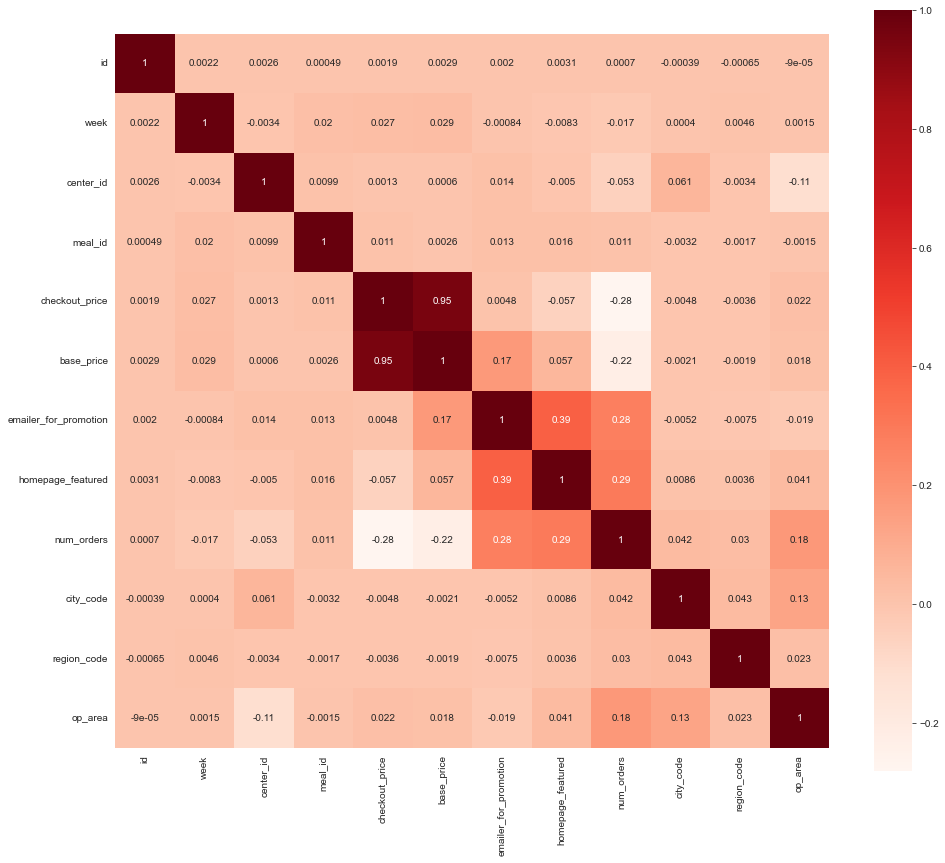

In [149]:
plt.figure(figsize=(16,14))
sns.heatmap(train.corr(),annot=True, square=True, cmap='Reds')

Strong correlation between base price and checkout price

Text(0.5, 0, 'Center Type')

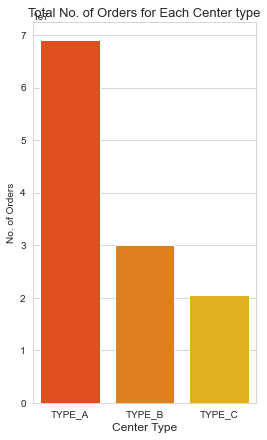

In [150]:
fig=plt.figure(figsize=(4,7))
plt.title('Total No. of Orders for Each Center type',fontdict={'fontsize':13})
sns.barplot(y='num_orders', x='center_type', data=train.groupby('center_type').sum()['num_orders'].reset_index(),palette='autumn');
plt.ylabel('No. of Orders',)
plt.xlabel('Center Type',fontdict={'fontsize':12})


In [151]:
train.groupby('center_type').sum()['num_orders'].reset_index()

,center_type,num_orders
0,TYPE_A,68978517
1,TYPE_B,29996073
2,TYPE_C,20582895


Type_A Centers have the highest number of Orders placed and Type_C has the least.

In [152]:
train['center_id'].nunique()

77

The are are 77 Fullfilment Centers in total.

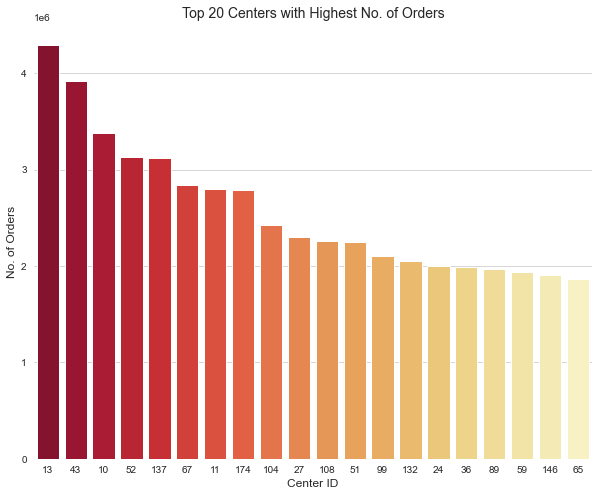

In [153]:
fig=plt.figure(figsize=(10,8))
plt.title('Top 20 Centers with Highest No. of Orders',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='center_id', data=train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20),palette='YlOrRd_r',order=list(train.groupby(['center_id','center_type']).num_orders.sum().sort_values(ascending=False).reset_index().head(20)['center_id']));
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Center ID',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

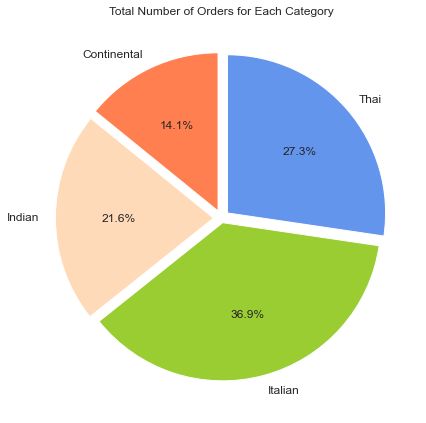

In [154]:
plt.figure(figsize=(6,6))
colors = ['coral','#FFDAB9','yellowgreen','#6495ED']
plt.pie(train.groupby(['cuisine']).num_orders.sum(),
    labels=train.groupby(['cuisine']).num_orders.sum().index,
    shadow=False,
    colors=colors,
    explode=(0.05, 0.05, 0.03,0.05),
    startangle=90, 
    autopct='%1.1f%%',pctdistance=0.6,
    textprops={'fontsize': 12})
plt.title('Total Number of Orders for Each Category')
plt.tight_layout()
plt.show()

Italian Cuisine has the highest number of orders with Continental cuisine being the least.

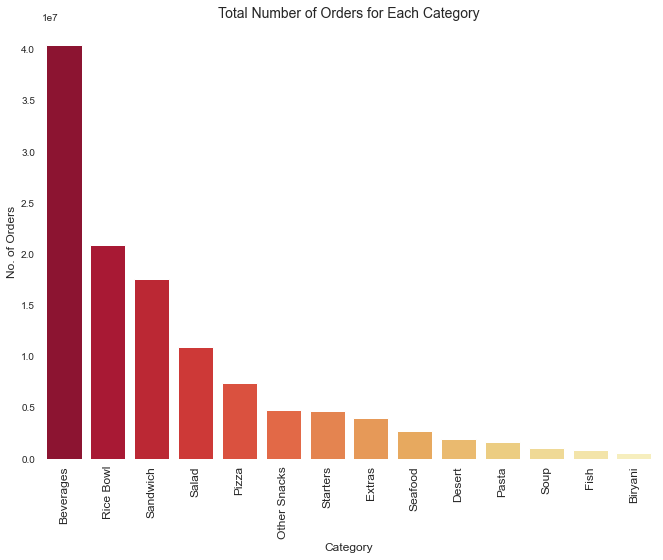

In [155]:
fig=plt.figure(figsize=(11,8))
sns.set_style("white")

plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Category',fontdict={'fontsize':14})
sns.barplot(y='num_orders', x='category', data=train.groupby('category').num_orders.sum().sort_values(ascending=False).reset_index(),palette='YlOrRd_r');
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

We could see that Beverages are the food category which has the higest number of orders and Biriyani is the food category with least number of orders.

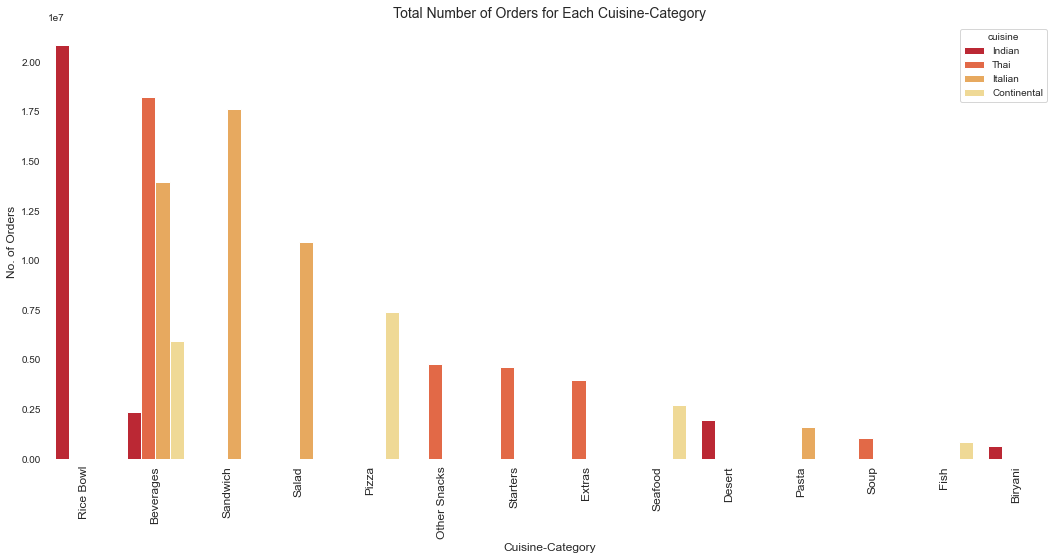

In [156]:
fig=plt.figure(figsize=(18,8))
sns.set_style("white")
plt.xticks(rotation=90,fontsize=12)
plt.title('Total Number of Orders for Each Cuisine-Category',fontdict={'fontsize':14})

sns.barplot(x='category',y='num_orders',data=train.groupby(['cuisine','category']).sum().sort_values(by='num_orders', ascending=False).reset_index(),hue='cuisine',palette='YlOrRd_r')

plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Cuisine-Category',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

Similary when we checked which specific cuisne-food category has the highest number of orders, we could see that Indian-Rice Bowl has the highest number of orders and Indian-Biriyani has the least.

In [157]:
pd.pivot_table(data=meal_info,index='category',columns=['cuisine'],aggfunc={'category':'count'},fill_value=0)

category                    
cuisine      Continental Indian Italian Thai
category                                    
Beverages              3      3       3    3
Biryani                0      3       0    0
Desert                 0      3       0    0
Extras                 0      0       0    3
Fish                   3      0       0    0
Other Snacks           0      0       0    3
Pasta                  0      0       3    0
Pizza                  3      0       0    0
Rice Bowl              0      3       0    0
Salad                  0      0       3    0
Sandwich               0      0       3    0
Seafood                3      0       0    0
Soup                   0      0       0    3
Starters               0      0       0    3

In [158]:
print('Total orders Per Week:-')
for i in train.week.unique():
    print(f'week-{i}--->{train[train.week==i].num_orders.sum()} orders.')

Total orders Per Week:-
week-1--->792261 orders.
week-2--->787084 orders.
week-3--->695262 orders.
week-4--->743529 orders.
week-5--->1198675 orders.
week-6--->947288 orders.
week-7--->934803 orders.
week-8--->670518 orders.
week-9--->723243 orders.
week-10--->811825 orders.
week-11--->772225 orders.
week-12--->690259 orders.
week-13--->656102 orders.
week-14--->636981 orders.
week-15--->651719 orders.
week-16--->611515 orders.
week-17--->820285 orders.
week-18--->932560 orders.
week-19--->787196 orders.
week-20--->677834 orders.
week-21--->707013 orders.
week-22--->834111 orders.
week-23--->773271 orders.
week-24--->647341 orders.
week-25--->749583 orders.
week-26--->805805 orders.
week-27--->740014 orders.
week-28--->648863 orders.
week-29--->625414 orders.
week-30--->915399 orders.
week-31--->783214 orders.
week-32--->1034202 orders.
week-33--->730936 orders.
week-34--->693603 orders.
week-35--->630458 orders.
week-36--->724865 orders.
week-37--->877853 orders.
week-38--->974566 ord

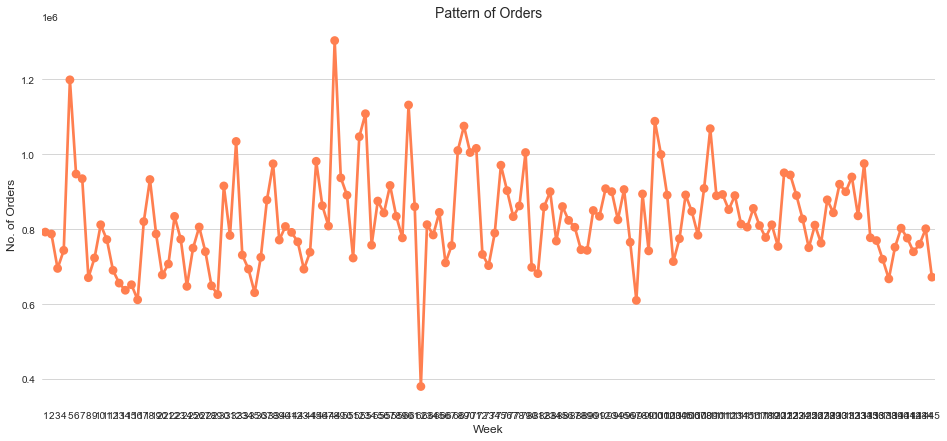

In [159]:
fig=plt.figure(figsize=(16,7))
sns.set_style("whitegrid")
plt.title('Pattern of Orders',fontdict={'fontsize':14})

sns.pointplot(x=train.groupby('week').sum().reset_index()['week'],y=train.groupby('week').sum().reset_index()['num_orders'],color='coral')
#plt.xticks(range(0, 150, 10), list(np.arange(0,160,10)))
plt.ylabel('No. of Orders',fontdict={'fontsize':12})
plt.xlabel('Week',fontdict={'fontsize':12})
sns.despine(bottom = True, left = True);

When we analysed the trend of order placed over the weeks, we could see that the highest number of orders were received in week 48 and the lowest in week 62.

In [160]:
train[(train.homepage_featured==1) & (train.emailer_for_promotion==1)].groupby(by=['center_type','category']).agg(avg_area_op=pd.NamedAgg('op_area','mean'),
                                          avg_base_price=pd.NamedAgg('base_price','mean'),
                                          avg_checkout_price=pd.NamedAgg('checkout_price','mean'),
                                            max_base_price=pd.NamedAgg('base_price','max'),max_checkout_price=pd.NamedAgg('base_price','max'),
                                            homepage_and_email=pd.NamedAgg('homepage_featured','count'),
                                          total_num_of_orders=pd.NamedAgg("num_orders",'sum'))
                                                            

avg_area_op  avg_base_price  avg_checkout_price  \
center_type category                                                        
TYPE_A      Beverages        4.145879      270.343118          211.002390   
            Desert           4.081250      478.699107          368.911756   
            Fish             4.413636      630.711818          437.497273   
            Other Snacks     3.911211      288.021166          243.141031   
            Pasta            4.152000      428.921553          344.437200   
            Pizza            4.106515      643.094229          487.706934   
            Rice Bowl        4.076098      340.325618          239.136772   
            Salad            4.116517      285.715723          213.555839   
            Sandwich         4.074718      302.295444          221.027697   
            Seafood          4.164391      675.746876          459.852724   
            Starters         4.074396      286.507657          206.358913   
TYPE_B      Beverages        4.846889      268.229356          202.767067   
            Desert           4.798039      484.281503          366.444706   
            Fish             5.582609      629.006522          437.370870   
            Other Snacks     4.086747      289.966867          243.512048   
            Pasta            4.740104      431.718854          346.956719   
            Pizza            4.716667      643.701394          485.565000   
            Rice Bowl        4.745814      341.805465          239.483535   
            Salad            4.935156      285.931328          212.502266   
            Sandwich         4.791718      300.607184          220.736190   
            Seafood          4.842390      671.391686          460.336939   
            Starters         4.771739      286.220000          205.834275   
TYPE_C      Beverages        3.384704      274.926233          217.524398   
            Desert           3.436667      476.201000          369.323444   
            Other Snacks     3.421429      285.968929          243.259643   
            Pasta            3.545361      417.859072          333.459691   
            Pizza            3.399421      641.576777          488.513256   
            Rice Bowl        3.217814      345.178117          247.121174   
            Salad            3.311644      280.275582          211.940856   
            Sandwich         3.230035      300.195851          223.144844   
            Seafood          3.524638      673.301594          460.982899   
            Starters         3.526619      286.719928          206.068201   

                          max_base_price  max_checkout_price  \
center_type category                                           
TYPE_A      Beverages             515.13              515.13   
            Desert                602.43              602.43   
            Fish                  631.53              631.53   
            Other Snacks          292.03              292.03   
            Pasta                 641.23              641.23   
            Pizza                 728.53              728.53   
            Rice Bowl             466.63              466.63   
            Salad                 363.81              363.81   
            Sandwich              367.69              367.69   
            Seafood               865.27              865.27   
            Starters              292.03              292.03   
TYPE_B      Beverages             515.13              515.13   
            Desert                737.23              737.23   
            Fish                  631.53              631.53   
            Other Snacks          313.37              313.37   
            Pasta                 553.93              553.93   
            Pizza                 699.43              699.43   
            Rice Bowl             466.63              466.63   
            Salad                 362.81              362.81   
            Sandwich              376.42              376.42   

In [161]:
train.homepage_featured.value_counts()

0    406693
1     49855
Name: homepage_featured, dtype: int64

In [162]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['category']=le.fit_transform(train['category'])
train['cuisine']=le.fit_transform(train['cuisine'])
train['center_type']=le.fit_transform(train['center_type'])

In [163]:
train.drop(['center_id','meal_id','id'],axis=1,inplace=True)

In [164]:
def outlier_func(df,*col):
    for i in col:
        Q1,Q3 = np.percentile(df[i],[25,75])   
        IQR = Q3-Q1                              # getting IQR 
        LowerRange = Q1-(1.5 * IQR)              # getting Lowrange
        UpperRange = Q3+(1.5 * IQR)
        index_del=df[(df[i]<LowerRange) | (df[i]>UpperRange)].index
        df.drop(index_del,inplace=True)
    return df

In [165]:
train.shape

(456548, 12)

In [166]:
outlier_func(train,*(train.columns.to_list()))

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
5182,62,145.56,145.56,0,0,379,0,3,614,85,1,3.6
5232,112,148.47,146.47,0,0,553,0,3,614,85,1,3.6
5302,62,142.59,143.59,0,0,231,0,3,614,85,1,3.6
5352,112,151.35,152.35,0,0,298,0,3,614,85,1,3.6
5375,135,150.38,149.38,0,0,392,0,3,614,85,1,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...
456539,137,631.53,631.53,0,0,41,4,0,473,77,0,4.5
456544,142,581.03,582.03,0,0,42,4,0,473,77,0,4.5
456545,143,583.03,581.03,0,0,40,4,0,473,77,0,4.5
456546,144,582.03,581.03,0,0,53,4,0,473,77,0,4.5


In [167]:
train.shape

(324507, 12)

In [168]:
train2 = train.copy()
correlation = train2.corr(method='pearson')
columns= correlation.nlargest(8,'num_orders').index
columns

Index(['num_orders', 'cuisine', 'op_area', 'category', 'region_code',
       'city_code', 'week', 'center_type'],
      dtype='object')

In [169]:
train2.head()

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
5182,62,145.56,145.56,0,0,379,0,3,614,85,1,3.6
5232,112,148.47,146.47,0,0,553,0,3,614,85,1,3.6
5302,62,142.59,143.59,0,0,231,0,3,614,85,1,3.6
5352,112,151.35,152.35,0,0,298,0,3,614,85,1,3.6
5375,135,150.38,149.38,0,0,392,0,3,614,85,1,3.6


In [170]:
features = columns.drop(['num_orders'])
train3 = train[features]

In [171]:
train3.head()

,cuisine,op_area,category,region_code,city_code,week,center_type
5182,3,3.6,0,85,614,62,1
5232,3,3.6,0,85,614,112,1
5302,3,3.6,0,85,614,62,1
5352,3,3.6,0,85,614,112,1
5375,3,3.6,0,85,614,135,1


In [172]:
X=train3.values
Y=train['num_orders'].values

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
import xgboost as xg 
from sklearn import metrics

In [176]:
model_xg=xg.XGBRegressor()
model_xg.fit(x_train,y_train)
y_pred_xg=model_xg.predict(x_test)
y_pred_xg[y_pred_xg<0]=0
print("RMSLE score : ",np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_xg)))
print("R2 score : ",metrics.r2_score(y_test, y_pred_xg))
print("MSE score : ",metrics.mean_squared_error(y_test, y_pred_xg))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_xg)))

RMSLE score :  0.6267281498809792
R2 score :  0.6842853043366774
MSE score :  6870.334691113253
RMSE :  82.88748211348474


In [177]:
model_DT=DT()
model_DT.fit(x_train,y_train)
y_pred_DT=model_DT.predict(x_test)
y_pred_DT[y_pred_DT<0]=0
print("RMSLE score : ",np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_DT)))
print("R2 score : ",metrics.r2_score(y_test, y_pred_DT))
print("MSE score : ",metrics.mean_squared_error(y_test, y_pred_DT))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))

RMSLE score :  0.7314314860925774
R2 score :  0.43929980031795945
MSE score :  12201.516388383852
RMSE :  110.46047432626682


In [178]:
model_gbr=GBR()
model_gbr.fit(x_train,y_train)
y_pred_gbr=model_gbr.predict(x_test)
y_pred_gbr[y_pred_gbr<0]=0
print("RMSLE score : ",np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_gbr)))
print("R2 score : ",metrics.r2_score(y_test, y_pred_gbr))
print("MSE score : ",metrics.mean_squared_error(y_test, y_pred_gbr))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

RMSLE score :  0.7208033818940532
R2 score :  0.5805895700128938
MSE score :  9126.879637012386
RMSE :  95.53470383589612


In [179]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred[y_pred<0]=0
print("RMSLE score : ",np.sqrt(metrics.mean_squared_log_error(y_test,y_pred)))
print("R2 score : ",metrics.r2_score(y_test, y_pred))
print("MSE score : ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSLE score :  1.118376436510372
R2 score :  0.05963268053494264
MSE score :  20463.533392818597
RMSE :  143.05080703309085


In [180]:
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7]}
clf = GridSearchCV(estimator=model_xg, 
                  param_grid=params,
                  scoring='neg_mean_squared_error', 
                   verbose=1)

In [181]:
# clf.fit(x_train,y_train)

In [182]:
# clf.best_params_

In [183]:
import pickle

In [184]:
pickle.dump(model_xg,open('new_food_demand.pkl','wb'))

In [185]:
model_xg

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [186]:
test_final=pd.merge(test,meal_info,on='meal_id',how='outer')
test_final=pd.merge(test_final,center_info,on='center_id',how='outer')
test_final = test_final.drop(['meal_id',"center_id"], axis=1)

In [187]:
test_final.shape

(32573, 12)

In [188]:
le=LabelEncoder()
test_final['category']=le.fit_transform(test_final['category'])
test_final['cuisine']=le.fit_transform(test_final['cuisine'])
test_final['center_type']=le.fit_transform(test_final['center_type'])

In [189]:
X_test=test_final[features].values

In [190]:
print(test_final)

            id  week  checkout_price  base_price  emailer_for_promotion  \
0      1028232   146          158.11      159.11                      0   
1      1262649   147          159.11      159.11                      0   
2      1453211   149          157.14      158.14                      0   
3      1262599   150          159.14      157.14                      0   
4      1495848   151          160.11      159.11                      0   
...        ...   ...             ...         ...                    ...   
32568  1412025   146          583.03      581.03                      0   
32569  1287019   147          582.03      582.03                      0   
32570  1396176   149          629.53      629.53                      0   
32571  1331977   150          629.53      629.53                      0   
32572  1017414   152          630.53      631.53                      0   

       homepage_featured  category  cuisine  city_code  region_code  \
0                      0    

In [191]:
model_pred=model_xg.predict(X_test)
model_pred[model_pred<0]=0

In [192]:
submission=pd.DataFrame({'id':test_final['id'], 'week':test_final['week'],'base_price':test_final['base_price'], 'category':test_final['category'], 'cuisine':test_final['cuisine'], 'city_code':test_final['city_code'], 'region_code':test_final['region_code'],'predicted_num_orders':model_pred})

In [193]:
submission.to_csv('submission.csv',index=False)

In [194]:
submission.describe()

,id,week,base_price,category,cuisine,city_code,region_code,num_orders
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,356.493615,5.233138,1.550517,601.519971,56.712154,174.511383
std,1.441580e+05,2.864072,155.150101,4.391436,1.107067,65.996677,17.641174,130.614090
min,1.000085e+06,146.000000,89.240000,0.000000,0.000000,456.000000,23.000000,0.000000
25%,1.123969e+06,148.000000,243.500000,0.000000,1.000000,556.000000,34.000000,61.204964
50%,1.247296e+06,150.000000,321.130000,5.000000,2.000000,596.000000,56.000000,139.115173
75%,1.372971e+06,153.000000,455.930000,9.000000,3.000000,651.000000,77.000000,269.532196
max,1.499996e+06,155.000000,1112.620000,13.000000,3.000000,713.000000,93.000000,574.481689
